In [1]:
from shapely.geometry import Point, Polygon
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from scipy import stats

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

%run ../python_files/feature_selection_blocks

sns.set_context('talk')
sns.set_palette(sns.diverging_palette(10, 220, sep=80, n=8))

%matplotlib inline 

# import warnings
# set_warnings(false)

# Data Evaluation

In [2]:
# import data
puds = pd.read_csv('../data/final_datasets/master_puds_blocks.csv')

In [3]:
# feature engineering
puds = create_demo_col(puds)
minipuds = agg_puds(puds)

In [4]:
continuous = ['eviction-rate','population', 'poverty-rate',
       'renter-occupied-households', 'pct-renter-occupied',
       'median-gross-rent', 'median-household-income', 'median-property-value',
       'rent-burden', 'pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind',
       'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other', '% Affordable Units']

In [5]:
puds[continuous]

,eviction-rate,population,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,rent-burden,pct-white,pct-af-am,pct-hispanic,pct-am-ind,pct-asian,pct-nh-pi,pct-multiple,pct-other,% Affordable Units
0,0.53,1431.0,0.00,377.0,53.29,2568.0,141792.0,1133500.0,22.1,85.67,1.47,10.76,0.00,2.10,0.0,0.00,0.00,NaN
1,0.00,1367.0,0.00,548.0,53.75,1846.0,124808.0,796900.0,21.2,84.64,3.29,4.97,0.00,3.51,0.0,1.61,1.98,NaN
2,0.51,1209.0,0.00,195.0,28.04,3018.0,237604.0,1994200.0,10.8,78.49,0.00,10.67,0.99,8.52,0.0,1.32,0.00,NaN
3,0.38,1202.0,0.00,260.0,34.21,3200.0,240045.0,1594700.0,21.4,77.54,0.00,16.22,0.00,6.24,0.0,0.00,0.00,NaN
4,0.00,3685.0,0.00,1.0,0.00,NaN,NaN,NaN,NaN,65.51,7.41,9.06,0.00,13.43,0.0,4.34,0.24,NaN
5,0.00,1208.0,0.00,217.0,34.01,2158.0,192750.0,1330700.0,25.1,84.93,3.64,6.79,0.00,3.89,0.0,0.75,0.00,NaN
6,0.00,752.0,4.50,139.0,19.94,1675.0,188846.0,1163500.0,22.8,97.74,0.00,0.00,0.00,1.46,0.0,0.80,0.00,NaN
7,0.00,887.0,0.00,299.0,44.44,2455.0,109583.0,1419600.0,50.0,84.55,6.09,6.43,0.00,1.80,0.0,1.13,0.00,NaN
8,0.00,1970.0,0.00,342.0,40.54,2369.0,101250.0,648200.0,50.0,67.56,13.20,7.36,0.41,6.45,0.0,5.03,0.00,NaN
9,0.00,1174.0,0.00,248.0,51.96,2273.0,127778.0,650300.0,26.0,93.27,0.00,5.37,0.00,1.36,0.0,0.00,0.00,NaN


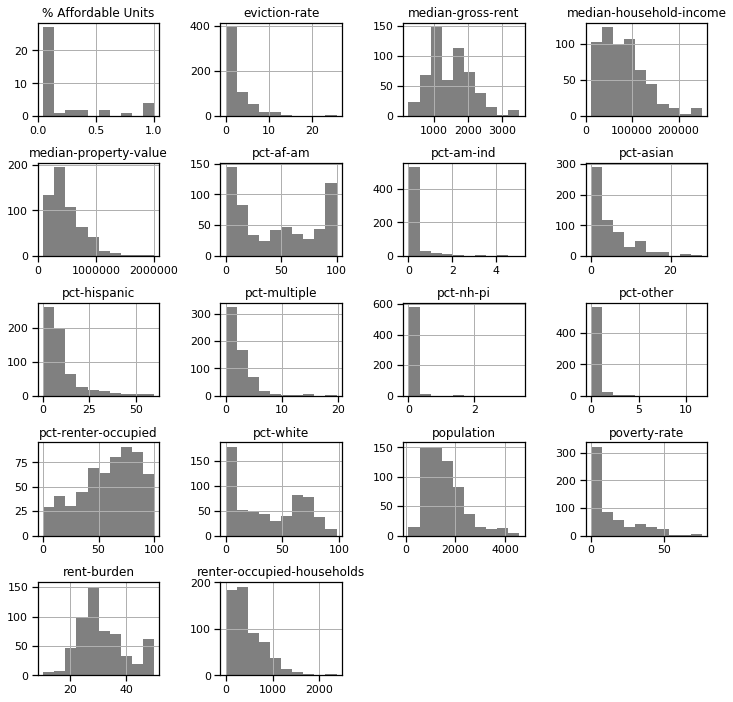

In [6]:
sns.set_context('notebook')
puds[continuous].hist(figsize  = [12, 12], color='gray'); 
plt.subplots_adjust(wspace=.5, hspace=.5)

In [7]:
puds_log_transform = puds[continuous].transform(lambda x: np.log(x + 1))

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(puds_log_transform)
scaled = pd.DataFrame(scaled_data)
scaled.columns = continuous

In [11]:
scaled.head(3)

,eviction-rate,population,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,rent-burden,pct-white,pct-af-am,pct-hispanic,pct-am-ind,pct-asian,pct-nh-pi,pct-multiple,pct-other,% Affordable Units
0,-0.689580,0.069429,-1.138841,0.145107,0.107711,1.406308,1.166031,1.842831,-1.171633,1.002654,-1.860747,0.555791,-0.402683,-0.103373,-0.144833,-1.385495,-0.407127,NaN
1,-1.237794,-0.024710,-1.138841,0.532906,0.119134,0.677903,0.966234,1.150191,-1.320294,0.994640,-1.431729,-0.121967,-0.402683,0.270944,-0.144833,0.002200,3.000601,NaN
2,-0.706542,-0.277402,-1.138841,-0.537357,-0.739394,1.762633,1.974467,2.953405,-3.684456,0.944689,-2.563423,0.548111,1.791616,1.016892,-0.144833,-0.168173,-0.407127,NaN


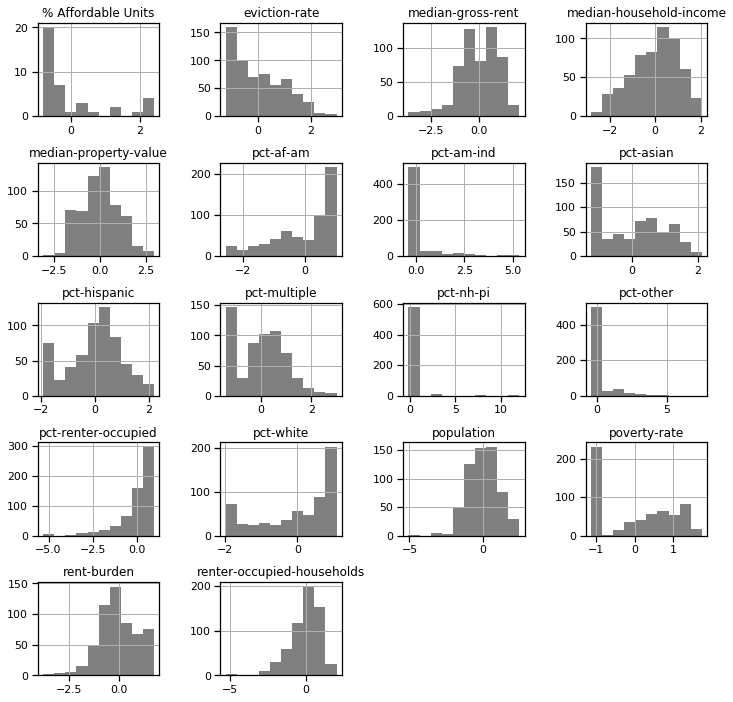

In [12]:
sns.set_context('notebook')
pd.DataFrame(scaled).hist(figsize  = [12, 12], color='gray'); 
plt.subplots_adjust(wspace=.5, hspace=.5)

# All Features Linear Regression Model

In [13]:
# remove the pct-other feature to address issue of multicolinearity 
x_cols_all = ['population',
 'poverty-rate',
 'renter-occupied-households',
 'pct-renter-occupied',
 'median-gross-rent',
 'median-household-income',
 'median-property-value',
 'rent-burden',
 'pct-white',
 'pct-af-am',
 'pct-hispanic',
 'pct-am-ind',
 'pct-asian',
 'pct-nh-pi',
 'pct-multiple',
 '% Affordable Units']

In [14]:
# set up linear regression
X = scaled.fillna(0).drop(['eviction-rate','pct-other'],axis=1)
y = scaled['eviction-rate']

# fit model
X = sm.add_constant(X)
model = sm.OLS(y, X, hasconst=True )
result = model.fit()
labels = ['intercept'] + x_cols_all
result.summary(xname=labels)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          eviction-rate   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     59.97
Date:                Tue, 03 Dec 2019   Prob (F-statistic):          1.14e-111
Time:                        20:18:50   Log-Likelihood:                -558.23
No. Observations:                 599   AIC:                             1150.
Df Residuals:                     582   BIC:                             1225.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
intercept                  -2.776e-17      0.025  -1.09e-15      1.000      -0.050       0.050
population                     0.0072      0.035      0.206      0.837      -0.061       0.076
poverty-rate                   0.1778      0.037      4.810      0.000       0.105       0.250
renter-occupied-households     0.0716      0.055      1.298      0.195      -0.037       0.180
pct-renter-occupied            0.0358      0.051      0.696      0.487      -0.065       0.137
median-gross-rent             -0.0960      0.043     -2.217      0.027      -0.181      -0.011
median-household-income       -0.1305      0.056     -2.333      0.020      -0.240      -0.021
median-property-value         -0.0331      0.042     -0.781      0.435      -0.116       0.050
rent-burden                   -0.0766      0.031     -2.458      0.014      -0.138      -0.015
pct-white                     -0.3760      0.053     -7.066      0.000      -0.480      -0.271
pct-af-am                      0.1050      0.044      2.412      0.016       0.019       0.191
pct-hispanic                  -0.0674      0.029     -2.342      0.020      -0.124      -0.011
pct-am-ind                     0.0378      0.026      1.461      0.144      -0.013       0.088
pct-asian                     -0.0032      0.039     -0.082      0.935      -0.081       0.074
pct-nh-pi                      0.0216      0.026      0.834      0.405      -0.029       0.072
pct-multiple                   0.0309      0.029      1.075      0.283      -0.026       0.087
% Affordable Units             0.1054      0.101      1.039      0.299      -0.094       0.305
==============================================================================
Omnibus:                       15.040   Durbin-Watson:                   1.588
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               29.059
Skew:                           0.070   Prob(JB):                     4.90e-07
Kurtosis:                       4.070   Cond. No.                         8.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Remove Outliers

In [133]:
puds_to_transform = pd.concat([puds[x_cols_all],puds['eviction-rate']],axis=1)
puds_cleaned = puds_to_transform[(np.abs(stats.zscore(test)) < 3).all(axis=1)]
puds_cleaned = puds_cleaned.fillna(0)
puds_cleaned

,population,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,rent-burden,pct-white,pct-af-am,pct-hispanic,pct-am-ind,pct-asian,pct-nh-pi,pct-multiple,% Affordable Units,eviction-rate
0,1431.0,0.00,377.0,53.29,2568.0,141792.0,1133500.0,22.1,85.67,1.47,10.76,0.00,2.10,0.0,0.00,0.000000,0.53
1,1367.0,0.00,548.0,53.75,1846.0,124808.0,796900.0,21.2,84.64,3.29,4.97,0.00,3.51,0.0,1.61,0.000000,0.00
4,3685.0,0.00,1.0,0.00,0.0,0.0,0.0,0.0,65.51,7.41,9.06,0.00,13.43,0.0,4.34,0.000000,0.00
5,1208.0,0.00,217.0,34.01,2158.0,192750.0,1330700.0,25.1,84.93,3.64,6.79,0.00,3.89,0.0,0.75,0.000000,0.00
6,752.0,4.50,139.0,19.94,1675.0,188846.0,1163500.0,22.8,97.74,0.00,0.00,0.00,1.46,0.0,0.80,0.000000,0.00
8,1970.0,0.00,342.0,40.54,2369.0,101250.0,648200.0,50.0,67.56,13.20,7.36,0.41,6.45,0.0,5.03,0.000000,0.00
9,1174.0,0.00,248.0,51.96,2273.0,127778.0,650300.0,26.0,93.27,0.00,5.37,0.00,1.36,0.0,0.00,0.000000,0.00
10,1486.0,0.00,823.0,81.01,1595.0,83720.0,260700.0,24.6,72.41,0.00,14.80,0.00,5.99,0.0,6.80,0.000000,0.24
11,1593.0,0.00,292.0,37.98,2106.0,135547.0,916100.0,36.1,61.52,13.87,6.65,0.00,15.13,0.0,2.82,0.000000,0.00
12,1593.0,0.00,292.0,37.98,2106.0,135547.0,916100.0,36.1,61.52,13.87,6.65,0.00,15.13,0.0,2.82,0.127273,0.00


# Train Test Split

In [134]:
X = puds_cleaned.drop('eviction-rate',axis=1)
y = puds_cleaned['eviction-rate']

In [135]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12)

In [136]:
# transform training data
X_train0 = X_train.transform(lambda x: np.log(x + 1))
X_train0 = scaler.fit_transform(X_train0)

y_train0 = y_train.transform(lambda x: np.log(x + 1))
y_train0 = scaler.fit_transform(np.array(y_train0).reshape(-1, 1))

In [137]:
X_train0 = pd.DataFrame(X_train0).fillna(0).values
X_test = pd.DataFrame(X_test).fillna(0).values

In [140]:
X_train0.shape

(440, 16)

In [143]:
puds_cleaned.columns

Index(['population', 'poverty-rate', 'renter-occupied-households',
       'pct-renter-occupied', 'median-gross-rent', 'median-household-income',
       'median-property-value', 'rent-burden', 'pct-white', 'pct-af-am',
       'pct-hispanic', 'pct-am-ind', 'pct-asian', 'pct-nh-pi', 'pct-multiple',
       '% Affordable Units', 'eviction-rate'],
      dtype='object')

In [145]:
# set up linear regression
X = X_train0
y = y_train0

# fit model
X = sm.add_constant(X)
model = sm.OLS(y, X, hasconst=True )
result = model.fit()
labels = ['intercept'] + x_cols_all
result.summary(xname=labels)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     44.19
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           8.97e-80
Time:                        21:10:43   Log-Likelihood:                -408.14
No. Observations:                 440   AIC:                             850.3
Df Residuals:                     423   BIC:                             919.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
intercept                   2.082e-17      0.030      7e-16      1.000      -0.058       0.058
population                     0.0594      0.039      1.527      0.127      -0.017       0.136
poverty-rate                   0.2221      0.043      5.134      0.000       0.137       0.307
renter-occupied-households    -0.0186      0.066     -0.283      0.777      -0.148       0.111
pct-renter-occupied            0.2010      0.066      3.066      0.002       0.072       0.330
median-gross-rent             -0.1057      0.047     -2.259      0.024      -0.198      -0.014
median-household-income        0.0463      0.033      1.382      0.168      -0.020       0.112
median-property-value          0.0236      0.034      0.692      0.489      -0.043       0.090
rent-burden                    0.0885      0.049      1.804      0.072      -0.008       0.185
pct-white                     -0.4313      0.058     -7.443      0.000      -0.545      -0.317
pct-af-am                      0.1515      0.049      3.116      0.002       0.056       0.247
pct-hispanic                  -0.0507      0.034     -1.488      0.138      -0.118       0.016
pct-am-ind                     0.0139      0.031      0.451      0.652      -0.047       0.075
pct-asian                     -0.0026      0.047     -0.057      0.955      -0.094       0.089
pct-nh-pi                     -0.0019      0.031     -0.062      0.951      -0.062       0.058
pct-multiple                   0.0303      0.034      0.882      0.378      -0.037       0.098
% Affordable Units             0.0057      0.030      0.190      0.849      -0.054       0.065
==============================================================================
Omnibus:                       10.021   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               15.192
Skew:                           0.152   Prob(JB):                     0.000502
Kurtosis:                       3.858   Cond. No.                         6.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Mini Model

In [146]:
X_train1 = pd.DataFrame(X_train0)
X_train1.columns = x_cols_all

In [147]:
# set up a mini-model
x_cols = ['pct-white', 'poverty-rate']

X = X_train1[x_cols].values
y = y_train0

# fit model
X = sm.add_constant(X)
model = sm.OLS(y, X, hasconst=True )
result = model.fit()
labels = ['intercept'] + x_cols
result.summary(xname=labels)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     298.4
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           1.93e-82
Time:                        21:11:19   Log-Likelihood:                -434.88
No. Observations:                 440   AIC:                             875.8
Df Residuals:                     437   BIC:                             888.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept     2.082e-17      0.031   6.69e-16      1.000      -0.061       0.061
pct-white       -0.4906      0.039    -12.618      0.000      -0.567      -0.414
poverty-rate     0.3562      0.039      9.161      0.000       0.280       0.433
==============================================================================
Omnibus:                        3.020   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.221   Jarque-Bera (JB):                3.313
Skew:                           0.043   Prob(JB):                        0.191
Kurtosis:                       3.416   Cond. No.                         2.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Lasso

In [1]:
!pip install cvxopt

     |████████████████████████████████| 5.7MB 7.2MB/s eta 0:00:01


In [149]:
# set up linear regression
X = X_train0
y = y_train0

# fit model
X = sm.add_constant(X)
model = sm.OLS(y, X, hasconst=True)
result = model.fit_regularized(method='sqrt_lasso', alpha=1)
labels = ['intercept'] + x_cols_all
result.summary(xname=labels)

ValueError: sqrt_lasso fitting requires the cvxopt module to be installed

In [26]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)
lasso.fit(X_train0, y_train0)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [27]:
X_train0.shape

(539, 16)

In [28]:
X_test.shape

(60, 16)

In [29]:
y_h_lasso_train = np.reshape(lasso.predict(X_train0), (539, 1))
y_h_lasso_test = np.reshape(lasso.predict(X_test), (60, 1))

In [30]:
print('Train Error Lasso Model', np.sum((y_train0 - y_h_lasso_train)**2))
print('Test Error Lasso Model', np.sum((np.array(y_test).reshape(1,-1) - y_h_lasso_test)**2))
print('\n')

Train Error Lasso Model 538.9999999999999
Test Error Lasso Model 59178.684




# Lin Reg with Categorical Variables - Wards

In [31]:
outcome = 'eviction-rate'

In [32]:
# can you predict eviction rate based on ward?

# set up single linear regression
encoder = OneHotEncoder(handle_unknown="error", drop='first')
X_cat = encoder.fit_transform(np.array(minipuds['ward']).reshape(-1, 1)).toarray()

X = X_cat
y = minipuds[outcome]

# fit model
X = sm.add_constant(X)
model = sm.OLS(y, X, hasconst=True )
result = model.fit()
labels = ['intercept'] + [("ward_"+str(i)) for i in range(0,7)]
result.summary(xname=labels)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          eviction-rate   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     37.70
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           1.73e-39
Time:                        20:18:50   Log-Likelihood:                -857.88
No. Observations:                 367   AIC:                             1732.
Df Residuals:                     359   BIC:                             1763.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.4782      0.382      3.870      0.000       0.727       2.229
ward_0        -0.7764      0.512     -1.515      0.131      -1.784       0.231
ward_1        -1.0238      0.534     -1.916      0.056      -2.074       0.027
ward_2         1.0033      0.531      1.888      0.060      -0.042       2.048
ward_3         1.2599      0.534      2.358      0.019       0.209       2.311
ward_4        -0.3560      0.524     -0.680      0.497      -1.386       0.674
ward_5         4.5480      0.537      8.467      0.000       3.492       5.604
ward_6         5.2951      0.579      9.153      0.000       4.157       6.433
==============================================================================
Omnibus:                      318.045   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9434.005
Skew:                           3.467   Prob(JB):                         0.00
Kurtosis:                      26.850   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Multiple Linear Regression 1

In [33]:
# what about looking at more variables?

# set up multiple linear regression
x_cols = ['pct-non-white','poverty-rate', 'pct-renter-occupied','pud_count']

minitest = minipuds[x_cols]

X = minitest.values

encoder = OneHotEncoder(handle_unknown="error", drop='first')
X_cat = encoder.fit_transform(np.array(minipuds['ward']).reshape(-1, 1)).toarray()

X = np.concatenate((X, X_cat), axis = 1)
y = minipuds[outcome]

# fit model01
X = sm.add_constant(X)
model = sm.OLS(y, X, hasconst=True )
result = model.fit()
labels = ['intercept'] + x_cols + [("ward_"+str(i)) for i in range(0,7)]
result.summary(xname=labels)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          eviction-rate   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     27.84
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           9.83e-42
Time:                        20:18:50   Log-Likelihood:                -844.87
No. Observations:                 367   AIC:                             1714.
Df Residuals:                     355   BIC:                             1761.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept              -0.5232      0.661     -0.791      0.429      -1.824       0.778
pct-non-white           0.0320      0.009      3.708      0.000       0.015       0.049
poverty-rate            0.0080      0.014      0.578      0.563      -0.019       0.035
pct-renter-occupied     0.0035      0.007      0.496      0.620      -0.010       0.018
pud_count               0.1413      0.080      1.776      0.077      -0.015       0.298
ward_0                 -0.3365      0.519     -0.648      0.517      -1.357       0.684
ward_1                 -0.0703      0.564     -0.125      0.901      -1.179       1.038
ward_2                  0.1804      0.596      0.303      0.762      -0.991       1.352
ward_3                  0.2864      0.580      0.494      0.622      -0.854       1.426
ward_4                 -0.1715      0.519     -0.331      0.741      -1.192       0.849
ward_5                  2.9595      0.647      4.574      0.000       1.687       4.232
ward_6                  3.5112      0.703      4.993      0.000       2.128       4.894
==============================================================================
Omnibus:                      329.444   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11371.207
Skew:                           3.601   Prob(JB):                         0.00
Kurtosis:                      29.301   Cond. No.                         825.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Multicolinearity Check

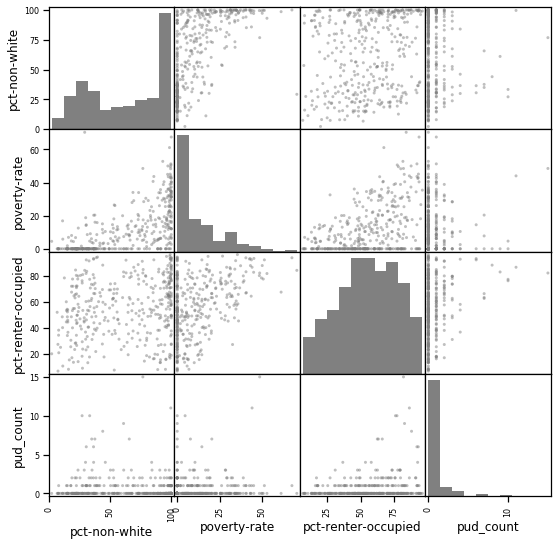

In [34]:
sns.set_context('notebook')
sns.set_palette('gray',1);
pd.plotting.scatter_matrix(minipuds[x_cols],figsize  = [9, 9]);

In [35]:
minipuds[x_cols].corr()

,pct-non-white,poverty-rate,pct-renter-occupied,pud_count
pct-non-white,1.000000,0.620089,0.206574,-0.043175
poverty-rate,0.620089,1.000000,0.456135,0.038441
pct-renter-occupied,0.206574,0.456135,1.000000,0.228971
pud_count,-0.043175,0.038441,0.228971,1.000000


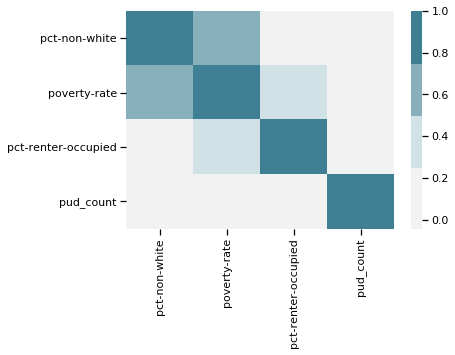

In [36]:
sns.heatmap(minipuds[x_cols].corr(), center=0, cmap=(sns.diverging_palette(10, 220, sep=80, n=8)));

# Multiple Linear Regression 2

In [37]:
# just continuous variables

# set up multiple linear regression
x_cols = ['pct-non-white','poverty-rate', 'pct-renter-occupied']

minitest = minipuds[x_cols]

X = minitest.values

encoder = OneHotEncoder(handle_unknown="error", drop='first')

X = minipuds[x_cols]
y = minipuds[outcome]

# fit model01
X = sm.add_constant(X)
model = sm.OLS(y, X, hasconst=True )
result = model.fit()
labels = ['intercept'] + x_cols
result.summary(xname=labels)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          eviction-rate   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     73.51
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           3.59e-37
Time:                        20:18:53   Log-Likelihood:                -871.89
No. Observations:                 367   AIC:                             1752.
Df Residuals:                     363   BIC:                             1767.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept              -1.4546      0.470     -3.092      0.002      -2.380      -0.530
pct-non-white           0.0523      0.006      9.302      0.000       0.041       0.063
poverty-rate            0.0358      0.013      2.681      0.008       0.010       0.062
pct-renter-occupied     0.0053      0.007      0.772      0.441      -0.008       0.019
==============================================================================
Omnibus:                      294.201   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7018.321
Skew:                           3.156   Prob(JB):                         0.00
Kurtosis:                      23.473   Cond. No.                         309.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

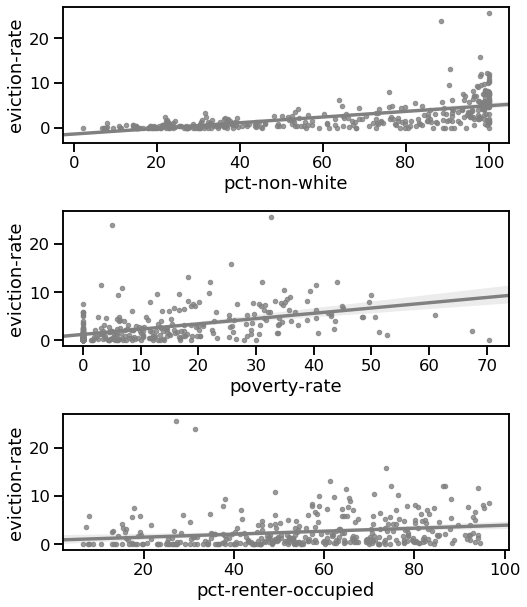

In [38]:
# Regression plots
sns.set_context('talk')
fig = plt.figure(figsize=(8,10))
for num in range(len(x_cols)):
    num += 1
    ax = fig.add_subplot(3,1, num)
    num -= 1
    sns.regplot(x=x_cols[num], y=outcome, data=minipuds, color='gray', marker=".")
    plt.subplots_adjust(wspace=.5, hspace=.5)

### Residual Check

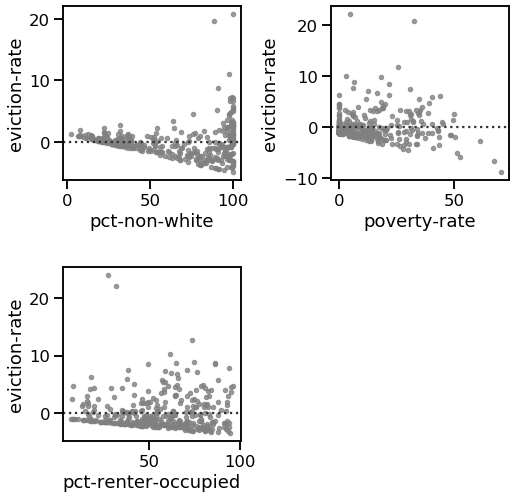

In [39]:
# Residual plots
fig = plt.figure(figsize=(8,8))
for num in range(len(x_cols)):
    num += 1
    ax = fig.add_subplot(2,2,num)
    num -= 1
    sns.residplot(x=x_cols[num], y=outcome, data=minipuds, color='gray', scatter_kws={"s": 20})
    plt.subplots_adjust(wspace=.5, hspace=.5)

# Linear Regression Model - Demographics

In [40]:
# set up single linear regression
x_cols = 'pct-non-white'

X = minipuds[x_cols].values
y = minipuds[outcome]

# # fit model03
X = sm.add_constant(X)
model = sm.OLS(y, X, hasconst=True )
result = model.fit()
labels = ['intercept'] + [x_cols]
result.summary(xname=labels)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          eviction-rate   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     203.5
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           5.33e-37
Time:                        20:18:54   Log-Likelihood:                -877.71
No. Observations:                 367   AIC:                             1759.
Df Residuals:                     365   BIC:                             1767.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        -1.4173      0.309     -4.590      0.000      -2.024      -0.810
pct-non-white     0.0633      0.004     14.264      0.000       0.055       0.072
==============================================================================
Omnibus:                      276.509   Durbin-Watson:                   1.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5676.690
Skew:                           2.931   Prob(JB):                         0.00
Kurtosis:                      21.354   Cond. No.                         155.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

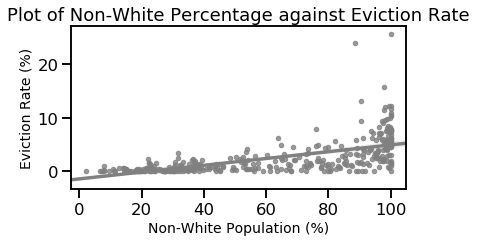

In [41]:
fig = plt.figure(figsize=(6,3))
ax = sns.regplot(x='pct-non-white', y=outcome, data=minipuds, color='gray', marker='.');
plt.title('Plot of Non-White Percentage against Eviction Rate');
ax.set_xlabel('Non-White Population (%)', size=14);
ax.set_ylabel('Eviction Rate (%)', size=14);
plt.show();

# Linear Regression Model - Poverty

In [42]:
# set up single linear regression
x_cols = 'poverty-rate'

X = minipuds[x_cols].values
y = minipuds[outcome]

# # fit model04
X = sm.add_constant(X)
model = sm.OLS(y, X, hasconst=True )
result = model.fit()
labels = ['intercept'] + [x_cols]
result.summary(xname=labels)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          eviction-rate   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     108.7
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           1.85e-22
Time:                        20:18:54   Log-Likelihood:                -911.15
No. Observations:                 367   AIC:                             1826.
Df Residuals:                     365   BIC:                             1834.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        1.2021      0.197      6.090      0.000       0.814       1.590
poverty-rate     0.1097      0.011     10.428      0.000       0.089       0.130
==============================================================================
Omnibus:                      275.951   Durbin-Watson:                   1.631
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4965.857
Skew:                           2.980   Prob(JB):                         0.00
Kurtosis:                      20.006   Cond. No.                         24.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

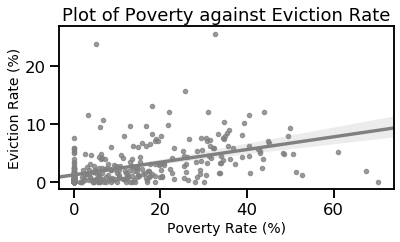

In [43]:
fig = plt.figure(figsize=(6,3))
ax = sns.regplot(x='poverty-rate', y=outcome, data=minipuds, color='gray', marker='.');
plt.title('Plot of Poverty against Eviction Rate');
ax.set_xlabel('Poverty Rate (%)', size=14);
ax.set_ylabel('Eviction Rate (%)', size=14);
plt.show();

# Linear Regression Model - % Renters

In [44]:
# set up single linear regression
x_cols = 'pct-renter-occupied'

X = minipuds[x_cols].values
y = minipuds[outcome]

# # fit model05
X = sm.add_constant(X)
model = sm.OLS(y, X, hasconst=True )
result = model.fit()
labels = ['intercept'] + [x_cols]
result.summary(xname=labels)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          eviction-rate   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     16.75
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           5.25e-05
Time:                        20:18:55   Log-Likelihood:                -950.77
No. Observations:                 367   AIC:                             1906.
Df Residuals:                     365   BIC:                             1913.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept               0.8106      0.450      1.799      0.073      -0.075       1.696
pct-renter-occupied     0.0310      0.008      4.093      0.000       0.016       0.046
==============================================================================
Omnibus:                      261.285   Durbin-Watson:                   1.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3499.762
Skew:                           2.878   Prob(JB):                         0.00
Kurtosis:                      16.991   Cond. No.                         159.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

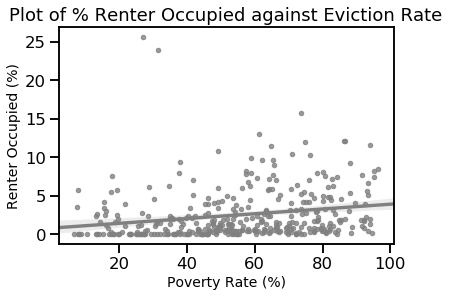

In [45]:
ax = sns.regplot(x='pct-renter-occupied', y=outcome, data=minipuds, color='gray', marker='.');
plt.title('Plot of % Renter Occupied against Eviction Rate');
ax.set_xlabel('Poverty Rate (%)', size=14);
ax.set_ylabel('Renter Occupied (%)', size=14);
plt.show();

# Multiple Linear Regression 3

In [46]:
# looking at top 2 predictor cols

# set up multiple linear regression
x_cols = ['pct-non-white','poverty-rate']

minitest = minipuds[x_cols]

X = minitest.values
y = minipuds[outcome]

# fit model01
X = sm.add_constant(X)
model = sm.OLS(y, X, hasconst=True )
result = model.fit()
labels = ['intercept'] + x_cols
result.summary(xname=labels)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          eviction-rate   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     110.1
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           4.05e-38
Time:                        20:18:55   Log-Likelihood:                -872.19
No. Observations:                 367   AIC:                             1750.
Df Residuals:                     364   BIC:                             1762.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        -1.1835      0.313     -3.786      0.000      -1.798      -0.569
pct-non-white     0.0518      0.006      9.278      0.000       0.041       0.063
poverty-rate      0.0402      0.012      3.332      0.001       0.016       0.064
==============================================================================
Omnibus:                      289.210   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6611.652
Skew:                           3.092   Prob(JB):                         0.00
Kurtosis:                      22.853   Cond. No.                         163.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linearity Check

In [47]:
# name = ['t value', 'p value']
# test = sms.linear_harvey_collier(result);
# # [print('Tests of linearity:')]
# # # [print("   - "+str(el[0])+": "+str(round(el[1],3))) for el in list(zip(name, test))]
# # zip(name, test)

### Data Viz

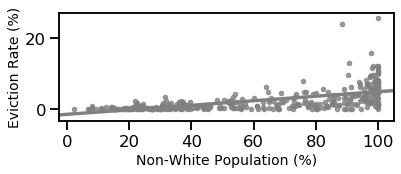

In [48]:
fig = plt.figure(figsize=(6,2))
ax = sns.regplot(x='pct-non-white', y=outcome, data=minipuds, color='gray', marker='.');
# plt.title('Plot of Non-White Percentage against Eviction Rate');
ax.set_xlabel('Non-White Population (%)', size=14);
ax.set_ylabel('Eviction Rate (%)', size=14);
# plt.setp(ax.get_xticklabels(), visible=False)
plt.show();

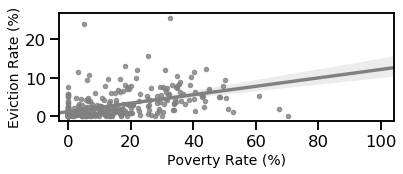

In [49]:
fig = plt.figure(figsize=(6,2))
plt.xlim(-3,104)
ax = sns.regplot(x='poverty-rate', y=outcome, data=minipuds, color='gray', marker='.');
ax.set_xlabel('Poverty Rate (%)', size=14);
ax.set_ylabel('Eviction Rate (%)', size=14);
# plt.title('Plot of Non-White Percentage against Eviction Rate');
# ax.set_xlim(-3,104)
plt.show();

### Residual Check

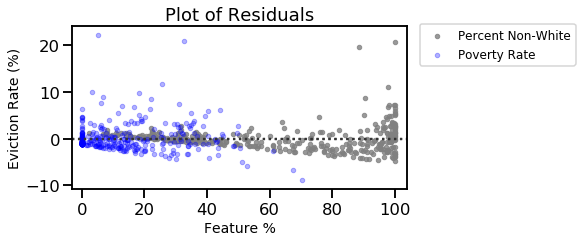

In [50]:
fig = plt.figure(figsize=(6,3))
plt.title('Plot of Residuals');
plt.xlim(-3,104)
ax = sns.residplot(x='pct-non-white', y=outcome, data=minipuds, color='gray', scatter_kws={"s": 20, 'alpha': .8}, label='Percent Non-White');
ax = sns.residplot(x='poverty-rate', y=outcome, data=minipuds, color='blue', scatter_kws={"s": 20,'alpha': .3}, label='Poverty Rate');
ax.legend()
plt.legend(bbox_to_anchor=(1.02,1.05), loc="upper left", prop={'size': 12})

ax.set_xlabel('Feature %', size=14);
ax.set_ylabel('Eviction Rate (%)', size=14);



In [51]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [52]:
# name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
# test = sms.jarque_bera(result.resid)
# print([el for el in list(zip(name, test))])

In [53]:
name = ['Jarque-Bera', 'p-value', 'Skew', 'Kurtosis']
test = sms.jarque_bera(result.resid);
[print('Tests of normality of residuals:')]
[print("   - "+str(el[0])+": "+str(round(el[1],3))) for el in list(zip(name, test))];

Tests of normality of residuals:
   - Jarque-Bera: 6611.652
   - p-value: 0.0
   - Skew: 3.092
   - Kurtosis: 22.853


Intepretation:
- Large J-B value indicates that errors are not normally distributed
- p-value is less than alpha (.05) so reject null hypothesis of normal distribution
- Positive skew indicates that errors are right skewed (i.e. most of the distribution at the left)
- Kurtosis greater than 3 indicates that errors have heavier tails than the normal distribution

In [54]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(result.resid, result.model.exog);
[print('Tests of heteroskedasticty of residuals:')]
[print("   - "+str(el[0])+": "+str(round(el[1],3))) for el in list(zip(name, test))];

Tests of heteroskedasticty of residuals:
   - Lagrange multiplier statistic: 13.522
   - p-value: 0.001
   - f-value: 6.962
   - f p-value: 0.001


Intepretation:
- p-value is less than alpha (.05) so reject null hypothesis of homoskedasticity